In [1]:
import cv2 as cv
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from matplotlib import pyplot as plt
import numpy as np
from tensorflow.keras.regularizers import l1

In [2]:
(X_train, y_train), (X_test, y_test)= datasets.cifar10.load_data()

In [3]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

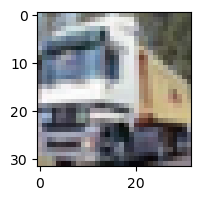

In [4]:
plt.figure(figsize = (15,2))
plt.imshow(X_train[1])

# Scaling down the data

In [5]:
X_train = X_train/255
X_test = X_test/ 255

In [6]:
y_train = y_train.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [7]:
class_name = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [8]:
class_name[9]

'truck'

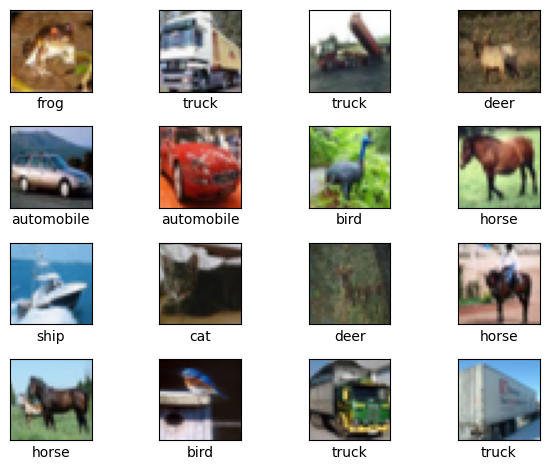

In [9]:

for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i],cmap=plt.cm.binary)
    plt.xlabel(class_name[y_train[i]])
plt.tight_layout()    
plt.show()
   

In [10]:
X_train = X_train[:40000]
y_train = y_train[:40000]
X_test = X_test[:7000]
y_test = y_test[:7000]

# Model building and Training

In [82]:

model = models.Sequential([
                  layers.Conv2D(filters= 32, kernel_size=(3,3), activation= 'relu',kernel_regularizer=l1(0.001), input_shape= (32,32,3)),
                  layers.MaxPooling2D((2,2)),
                  layers.Conv2D(filters= 64, kernel_size=(3,3), activation= 'relu', kernel_regularizer=l1(0.001)),
                  layers.MaxPooling2D((2,2)),
                  layers.Conv2D(filters= 64, kernel_size=(3,3), activation='relu'),
                  layers.Flatten(),
                  layers.Dense(64,activation= 'relu'),
                  layers.Dropout(0.2),
                  layers.Dense(64, activation= 'relu'),
                  layers.Dense(10, activation= 'softmax')
                  ])

In [83]:
model.compile(optimizer= 'adam', loss= 'sparse_categorical_crossentropy', metrics= ['accuracy'])

In [84]:
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
625/625 [==============================] - 7s 10ms/step - loss: 2.1417 - accuracy: 0.2603
Epoch 2/20
625/625 [==============================] - 7s 11ms/step - loss: 1.7740 - accuracy: 0.3803
Epoch 3/20
625/625 [==============================] - 6s 10ms/step - loss: 1.6183 - accuracy: 0.4406
Epoch 4/20
625/625 [==============================] - 6s 10ms/step - loss: 1.5395 - accuracy: 0.4730
Epoch 5/20
625/625 [==============================] - 6s 10ms/step - loss: 1.4745 - accuracy: 0.4990
Epoch 6/20
625/625 [==============================] - 6s 10ms/step - loss: 1.4290 - accuracy: 0.5202
Epoch 7/20
625/625 [==============================] - 6s 10ms/step - loss: 1.3810 - accuracy: 0.5393
Epoch 8/20
625/625 [==============================] - 6s 10ms/step - loss: 1.3351 - accuracy: 0.5520
Epoch 9/20
625/625 [==============================] - 6s 10ms/step - loss: 1.3010 - accuracy: 0.5652
Epoch 10/20
625/625 [==============================] - 6s 10ms/step - loss: 1.2693 - accura

In [88]:
loss, accuracy= model.evaluate(X_test,y_test)
print("Loss :", loss)
print("Accuracy:", accuracy)

219/219 [==============================] - 1s 5ms/step - loss: 1.2439 - accuracy: 0.6106
Loss : 1.2439119815826416
Accuracy: 0.6105714440345764


In [89]:
model.save('image_classifier.h5')

C:\Users\swarnadeep acharya\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [109]:
img= cv.imread('ship.jpg')

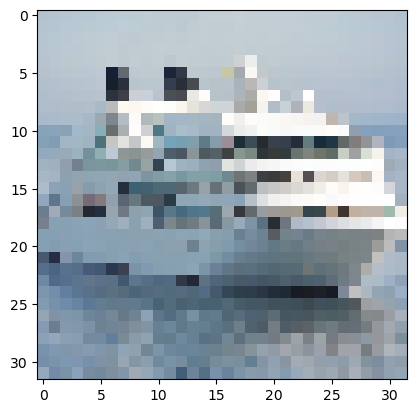

In [110]:
image = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(image, cmap=plt.cm.binary)

In [111]:
prediction = model.predict(np.array([image])/255)

1/1 [==============================] - 0s 45ms/step


In [112]:
index = np.argmax(prediction)

In [113]:
print("The prediction is:", class_name[index])

The prediction is: ship


In [114]:
y_pred = model.predict(X_test)

219/219 [==============================] - 2s 7ms/step


In [118]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred_classes = [np.argmax(element) for element in y_pred]
print(classification_report(y_test,y_pred_classes))

              precision    recall  f1-score   support

           0       0.69      0.56      0.62       704
           1       0.74      0.78      0.76       689
           2       0.56      0.45      0.50       701
           3       0.42      0.38      0.40       698
           4       0.55      0.50      0.52       722
           5       0.50      0.56      0.53       707
           6       0.55      0.85      0.67       698
           7       0.65      0.70      0.67       702
           8       0.79      0.67      0.73       686
           9       0.74      0.66      0.70       693

    accuracy                           0.61      7000
   macro avg       0.62      0.61      0.61      7000
weighted avg       0.62      0.61      0.61      7000

